# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

# Konten <a id='back'></a>

* [Pra_pemrosesan](#intro)
    * [memuat data](#memuat)
    * [Mengeksplorasi Data Awal](#awal)
    * [Kesimpulan dan Langkah - langkah](#langkah)
* [Mengatasi Nilai yang hilang](#missing)
* [Mengisi Nilai yang hilang](#missing_value)
* [Memperbaiki Tipe Data](#tipe)
* [Memperbaiki Kualitas Data](#kualitas)
* [Memeriksa Data yang sudah Bersih](#bersih)
* [Mempelajari Parameter Inti](#inti)
* [Mempelajari dan Menangani Outlier](#outlier)
* [Mempelajari Parameter Inti tanpa Outlier](#tanpa)
* [Masa berlaku Iklan](#iklan)
* [Harga rata-rata setiap kendaraan](#harga)
* [Faktor Harga](#faktor)
* [Kesimpulan Umum](#end)

## Pra-pemrosesan  <a id='intro'></a>

[Muat *library* yang Anda yakini akan dibutuhkan untuk proyek ini. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [1]:
# Muat semua library
import pandas as pd 
import matplotlib.pyplot as plt

### Memuat Data                         <a id='memuat'></a>

[Muat data proyek ini dan baca informasi umumnya.]

In [2]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Mengeksplorasi Data Awal <a id='awal'></a>

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()
df.describe ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# tampilkan sampel data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


* Deskripsi dan Informasi Umum dari pemeriksaan diatas adalah :
  * Dataframe terdiri dari 13 kolom
  * penamaan kolom sudah benar
  * jumlah keseluruhan baris data adalah 51525 namun ada beberapa kolom dengan nilai yang tidak sama kemungkinan adalah nilai yang hilang.
  * beberapa tipe data kolom nampak harus diperbaiki dan disesuaikan
  * ada nilai yang sepertinya mencurigakan pada saat menerapkan deskripsi untuk dataframe, ada nilai minimum odometer yang 0 atau mungkin kendaraan tersebut baru sehingga belum ada nilai jarak tempuhnya.


* Ada beberapa kolom yang tipe datanya kurang tepat diantara nya adalah :
     * 'model_year' adalah tahun pembuatan harusnya int 
     * 'cylinder' harusnya int juga karena jumlahnya pasti 
     * 'is_4wd' harusnya tipe boolean True or False 
     * 'date_posted' harusnya datetime.

* jumlah baris pada dataset seharusnya 51525 ,adanya nilai yang hilang pada beberapa kolom : 
    * 'model_year' 51525 - 47906  = 3619
    
    * 'cylinders' 51525 - 46265 = 5260
    
    * 'odometer' 51525 - 43633 = 7892
    
    * 'paint_color'51525 - 42258 = 9267
    
    * 'is_4wd' 51525 - 25572 = 25953

* kolom 'is_4wd' memiliki paling banyak nilai yang hilang dan datanya seharusnya bertipe Boolean, nilai yang hilang bisa terjadi karena kesalahan penginputan atau pemformatan data, mengenai nilai yang hilang tersebut harus dilakukan analisis lebih lanjut.

### Kesimpulan dan Langkah-Langkah Selanjutnya <a id='langkah'></a>



* Kesimpulan Sementara 
  * adanya nilai yang hilang dibeberapa kolom mempengaruhi nilai pada deskripsi dataframe , nilai rata - rata dan median akan terpengaruh sehingga hasilnya kemungkinan tidak valid 
  * pada kolom odometer nilai minimumnya 0 apakah ini kendaraan baru yang belum diiklankan sama sekali karena nilai day_listednya pun 0 
  * pada kolom 'price' terdapat nilai minimum 1, apakah harga kendaraan ini 1 

* Langkah Selanjutnya :
  * menangani nilai yang hilang , namun perlu dipelajari terlebih dahulu apakah data tersebut harus diisi atau dihapus
  * memperbaiki tipe data nya pada beberapa kolom
  * mengecek apakah ada duplikasi
  * memperbaiki kualitas data


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada) <a id='missing'></a>

In [6]:
#Menampilkan informasi Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
#nilai yang hilang pada kolom 'model_year'
model_year_missing = df['model_year'].isna().sum()
model_year_percentage = (model_year_missing / 51525) * 100
model_year_percentage 

7.023774866569626

* nilai yang hilang pada kolom 'model_year' adalah 3619 dan persentasenya adalah 7%

In [8]:
#nilai yang hilang pada kolom 'cylinders'
cylinders_missing = df['cylinders'].isna().sum()
cylinders_percentage = (cylinders_missing / 51525) * 100
cylinders_percentage

10.208636584182436

* nilai yang hilang pada kolom 'cylinders' adalah 5260 dan persentase nya 10.2%

In [9]:
#nilai yang hilang pada kolom 'odometer'
odometer_missing = df['odometer'].isna().sum()
odometer_percentage = (odometer_missing / 51525) * 100
odometer_percentage

15.316836487142163

* nilai yang hilang pada kolom 'odometer' adalah 7892 dan persentase nya adalah 15.3%

In [10]:
#nilai yang hilang pada kolom 'paint_color'
paint_color_missing = df['paint_color'].isna().sum()
paint_color_percentage = (paint_color_missing / 51525) * 100
paint_color_percentage 

17.985443959243085

* nilai hilang pada kolom 'paint-color' adalah 9267 dan persentase nya 17.9%

In [11]:
#nilai hilang pada kolom 'is_4wd'
is_4wd_missing = df['is_4wd'].isna().sum()
is_4wd_percentage = (is_4wd_missing / 51525) * 100
is_4wd_percentage

50.36972343522562

* nilai yang hilang pada kolom 'is_4wd' adalah 25953 dan persentase nya adalah 50.4% !!!

* Kesimpulan dan langkah berikutnya sementara untuk penanganan nilai yang hilang :
  * sebenarnya nilai hilang di kolom 'model_year' tidak terlalu besar hanya 7% namun semakin kita terapkan metode isna() ke bebrapa kolom persentase nilai yang hilang tampak semakin besar, hal ini terlihat pada kolom 'is_4wd' dengan persentase mencapai 50%
  * kolom 'is_4wd' memang memiliki nilai hilang terbanyak terlihat dari informasi dataframe awal
  * kolom - kolom dengan nilai yang hilang nampaknya berbeda kategori untuk kolom dengan variabel kategoris maka akan diterapkan metode fillna() 
  * kolom dengan variabel numerik akan di analisis terlebih dahulu apakah ada nilai oulier, jika tidak ada maka nilai yang hilang akan diisi dengan mean() jika ada oulier maka nilai yang hilang akan diisi dengan median()
  
* Kolom Kategoris :
  * kolom 'paint_color' yang merupakan warna dari kendaraan
  * kolom 'is_4wd' yang merupakan kolom yang menunjukan nilai apakah sebuah kendaraan bernilai True or False untuk keterangan penggerak 4 roda 

* kolom Numerik :
  * kolom 'model_year' yang berisi data numerik yang menunjukan tahun pembuatan kendaraan 
  * kolom 'cylinders' yang menunjukan jumlah silinder pada kendaraan
  * kolom 'odometer' yang merupakan jarak tempuh kendaraan pada saat iklan ditayangkan

* kemungkinan nilai hilang yang terjadi secara acak karena jumlah dan persentasenya berbeda untuk setiap kolom - kolomnya 

## Mengisi nilai yang hilang <a id='missing_value'></a>

In [12]:
#mengisi nilai yang hilang pada kolom kategoris 
df['model_year'] = df['model_year'].fillna(value='')

In [13]:
df['paint_color'] = df['paint_color'].fillna(value='')

In [14]:
df['is_4wd'] = df['is_4wd'].fillna(value='')

In [15]:
#mengisi nilai kolom numerik dengan mean()
# ubah dulu kolom 'model_year' dari string ke float.
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

In [16]:
model_year_mean = df['model_year'].mean()
model_year_mean_result = df['model_year'].fillna(model_year_mean)
model_year_mean_result

0        2011.00000
1        2009.75047
2        2013.00000
3        2003.00000
4        2017.00000
            ...    
51520    2013.00000
51521    2002.00000
51522    2009.00000
51523    2013.00000
51524    2014.00000
Name: model_year, Length: 51525, dtype: float64

In [17]:
cylinders_mean = df['cylinders'].mean()
cylinders_mean_result = df['cylinders'].fillna(cylinders_mean)
cylinders_mean_result

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64

In [18]:
odometer_mean = df['odometer'].mean()
odometer_mean_result = df['odometer'].fillna(odometer_mean)
odometer_mean_result 

0        145000.000000
1         88705.000000
2        110000.000000
3        115553.461738
4         80903.000000
             ...      
51520     88136.000000
51521    181500.000000
51522    128000.000000
51523    139573.000000
51524    115553.461738
Name: odometer, Length: 51525, dtype: float64

In [19]:
#mengisi nilai kolom numerik dengan median()
model_year_median = df['model_year'].median()
model_year_median_result = df['model_year'].fillna(model_year_median)
model_year_median_result

0        2011.0
1        2011.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64

In [20]:
cylinders_median = df['cylinders'].median()
cylinders_median_result = df['cylinders'].fillna(cylinders_median)
cylinders_median_result

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64

In [21]:
odometer_median = df['odometer'].median()
odometer_median_result = df['odometer'].fillna(odometer_median)
odometer_median_result

0        145000.0
1         88705.0
2        110000.0
3        113000.0
4         80903.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524    113000.0
Name: odometer, Length: 51525, dtype: float64

In [22]:
#mengisi nilai hilang pada kolom numerik dengan median()
df['model_year'] = model_year_median_result

In [23]:
df['cylinders'] = cylinders_median_result

In [24]:
df['odometer'] = odometer_median_result 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  object 
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


In [26]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Memperbaiki Tipe Data <a id='tipe'></a>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  object 
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


* kolom - kolom yang harus diganti tipe datanya :
  * 'model_year' adalah tahun pembuatan harusnya int 
  * 'cylinder' harusnya int juga karena jumlahnya pasti 
  * 'is_4wd' harusnya tipe boolean True or False 
  * 'date_posted' harusnya datetime.

In [28]:
df['model_year'] = df['model_year'].astype('int')

In [29]:
df['cylinders'] = df['cylinders'].astype('int')

In [30]:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [31]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


In [33]:
# periksa duplikasi (jika ada)
duplicates = df.duplicated()
duplicates.sum()

0

## Memperbaiki Kualitas Data <a id='kualitas'></a>

In [34]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [35]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['datetime_posted'] = df['date_posted'].dt.strftime('%Y-%m-%d %H:%M')

* metode 'dt' diterapkan untuk mengambil nilai per tahun , per bulan, per hari, perjam, per menit. 
* namun daripada harus menambah beberapa kolom untuk menentukan waktu, saya memilih menambah 1 kolom dengan keterangan Tahun, Bulan, tanggal(hari), Jam, Menit dan Detik dengan metode strftime()

In [36]:
# Tambahkan usia kendaraan saat iklan ditayangkan
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['model_year']

* usia kendaraan adalah tahun ini 'current_year' - 'model_year'.
* hasilnya diterapkan dalam kolom baru bernama 'age'

In [37]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['average_distance_per_year'] = df['odometer'] / df['age']

* menghitung jarak tempuh rata - rata setiap kendaraan per tahun adalah dengan membagi kolom jarak tempuh 'odometer' dengan usia kendaraan ['age'] dan menambahkan nilai-nilainya pada kolom baru yaitu 'average_distance_per_year]

In [38]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 

# membuat map dari kondisi kendaraan ke angka
condition_map = {"new": 5, "like new": 4, "excellent": 3, "good": 2, "fair": 1, "salvage": 0}

# mengganti nilai pada kolom "condition" dengan nilai numerik
df['condition'] = df['condition'].map(condition_map)


* mengubah nilai kolom 'condition' ke angka (numerik) agar lebih mudah untuk dimanipulasi
* lalu mengganti nilai - nilai tersebut ke kolom 'condition'

## Memeriksa Data yang Sudah Bersih <a id='bersih'></a>

In [39]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   price                      51525 non-null  int64         
 1   model_year                 51525 non-null  int64         
 2   model                      51525 non-null  object        
 3   condition                  51525 non-null  int64         
 4   cylinders                  51525 non-null  int64         
 5   fuel                       51525 non-null  object        
 6   odometer                   51525 non-null  float64       
 7   transmission               51525 non-null  object        
 8   type                       51525 non-null  object        
 9   paint_color                51525 non-null  object        
 10  is_4wd                     51525 non-null  bool          
 11  date_posted                51525 non-null  datetime64[ns]
 12  days

,price,model_year,condition,cylinders,odometer,days_listed,age,average_distance_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000
mean,12132.464920,2009.838234,2.637535,6.112450,115162.352179,39.55476,13.161766,9247.579780
std,10040.803015,6.065836,0.712447,1.573784,59909.264385,28.20427,6.065836,4567.249954
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,4.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,79181.000000,19.00000,9.000000,6400.000000
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.00000,12.000000,8941.176471
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,53.00000,16.000000,11562.500000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,115.000000,108888.888889


In [40]:
# tampilkan sampel data 
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,datetime_posted,age,average_distance_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,,True,2018-06-23,19,2018-06-23 00:00,12,12083.333333
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018-10-19 00:00,12,7392.083333
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019-02-07 00:00,10,11000.000000
3,1500,2003,ford f-150,1,8,gas,113000.0,automatic,pickup,,False,2019-03-22,9,2019-03-22 00:00,20,5650.000000
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019-04-02 00:00,6,13483.833333
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018-06-20 00:00,9,6439.333333
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018-12-27 00:00,8,9901.500000
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019-01-07 00:00,10,10947.300000
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,,True,2018-07-16,19,2018-07-16 00:00,11,9470.363636
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019-02-15 00:00,15,9812.733333


* DataFrame yang baru memiliki 16 kolom, yang sebelumnya memiliki 13 kolom. Kolom 'condition' sebelumnya memiliki tipe data string, sekarang memiliki tipe data integer. Kolom 'average_distance_per_year' sebelumnya memiliki tipe data float, sekarang juga memiliki tipe data float. Tipe data dari kolom 'date_posted' sekarang datetime64[ns].

* Menurut hasil describe(), data memiliki 51525 baris dengan mean jarak tempuh kendaraan per tahun sebesar 9247.579780, dengan standar deviasi sebesar 4567.249954. Minimal jarak tempuh adalah 0, dan maksimal rata - ratajarak tempuh adalah 108888.888889.

* Data odometer dengan nilai 0 mungkin tidak akurat, karena jarak tempuh pada kendaraan biasanya tidak 0. Begitu juga dengan average_distance_per_year, nilai 0 mungkin tidak akurat karena jarak tempuh rata-rata per tahun biasanya tidak 0. kita dapat memfilter atau membuang data-data tersebut jika diperlukan.

## Mempelajari Parameter Inti <a id='inti'></a>
[Pilih pendekatan yang tepat untuk mempelajari parameter yang tercantum di bawah ini, berikan perhatian khusus bagaimana *outlier* memengaruhi bentuk dan kemudahan pembacaan histogram.]

- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

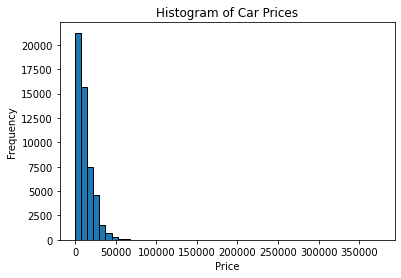

In [41]:
#histogram untuk parameter 'harga'
plt.hist(df['price'], bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Car Prices')
plt.show()


* puncak tertinggi 'price' ada di angka 0 histogram nya mencapai puncak dengan frekuensi 20.000 lebih, kemudian menurun landai terus ke angka price sama dengan 55.000 ,selebihnya tidak ada bahkan price tidak mencapai 100.000.
* Ini bisa menjadi indikasi bahwa ada data yang salah pada kolom "price", atau ada nilai-nilai yang diinput secara salah atau tidak sesuai. Sebaiknya melakukan pengecekan ulang pada data yang memiliki nilai 0 pada harga untuk memastikan kevalidan datanya dan menentukan apakah perlu untuk menghapus data tersebut atau memperbaikinya.

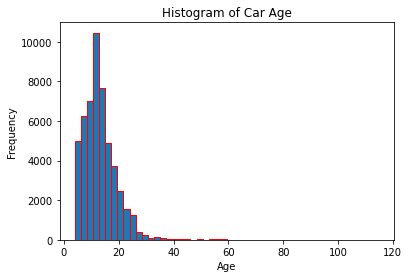

In [42]:
#histogram untuk parameter age 
plt.hist(df['age'], bins=50, edgecolor='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Car Age')
plt.show()

* diawali dari age sekitar angka 4 karena sesuai deskripsinya nilai minimun dari age adalah 4 lalu beranjak naik dan pada puncaknya pada age sama dengan 10 frekuensinya 10.000 lebih
* pada deskripsi data usia maksimum ada pada 115 tahun yitu kendaran - kendaraan keluaran tahun 1908 namun hal ini belum terlihat jelas pada histogram ini 

In [43]:
df[df['age'] == 115]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,datetime_posted,age,average_distance_per_year
33906,12995,1908,gmc yukon,2,8,gas,169328.0,automatic,SUV,black,False,2018-07-06,34,2018-07-06 00:00,115,1472.417391
33907,12995,1908,cadillac escalade,3,8,gas,113000.0,automatic,SUV,white,False,2018-06-24,25,2018-06-24 00:00,115,982.608696


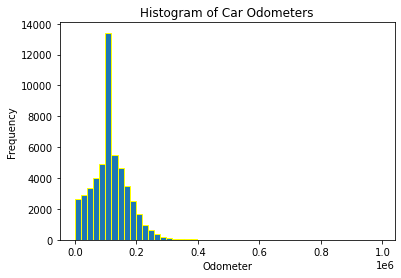

In [44]:
#histogram untuk 'jarak tempuh'
plt.hist(df['odometer'], bins=50, edgecolor='yellow')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Histogram of Car Odometers')
plt.show()


* dimulai dari odometer titik 0.0 ingat ini terjadi karena nilai minimim kolom odometer adalah 0 , lalu histogram menanjak naik diantara 0.0 dan 0.2.setelah itu turun melandai sampai titik terendah di 0.4
* ada nilai minimum 0 pada kolom 'odometer' di deskripsi data, ini tentu akan menjadi masalah bila tidak ditangani , nilai 0 sangat tidak mungkin mengingat usia kendaraan termasuk kendaraan 'bekas' seharusnya ada nlai odometernya 
* kesalahan ini terjadi mungkin karena penginputan data yang tidak valid 

In [45]:
df[df['odometer'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,datetime_posted,age,average_distance_per_year
352,7997,2009,gmc yukon,3,8,gas,0.0,automatic,SUV,white,True,2019-03-16,88,2019-03-16 00:00,14,0.0
814,2995,1999,ford f-150,2,6,gas,0.0,manual,truck,,False,2019-03-14,16,2019-03-14 00:00,24,0.0
1375,5888,2011,toyota 4runner,2,6,gas,0.0,automatic,SUV,black,False,2019-02-22,36,2019-02-22 00:00,12,0.0
1461,1000,1992,gmc sierra 1500,2,8,gas,0.0,automatic,truck,,False,2018-09-28,47,2018-09-28 00:00,31,0.0
1970,10988,2000,ford f-250 sd,2,8,diesel,0.0,automatic,truck,white,True,2018-11-21,39,2018-11-21 00:00,23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002,hyundai santa fe,2,6,gas,0.0,automatic,wagon,white,True,2019-04-14,31,2019-04-14 00:00,21,0.0
49284,3300,2002,hyundai santa fe,2,6,gas,0.0,automatic,wagon,white,True,2019-02-15,7,2019-02-15 00:00,21,0.0
50412,25500,2011,jeep wrangler,2,6,gas,0.0,automatic,SUV,yellow,True,2018-06-12,48,2018-06-12 00:00,12,0.0
50631,3600,2012,chrysler 200,2,4,gas,0.0,automatic,sedan,red,False,2018-07-24,90,2018-07-24 00:00,11,0.0


* Menghapus 185 baris data mungkin bukan solusi yang tepat dalam hal ini.Jika data ini merupakan bagian yang penting dari analisis, mungkin harus mempertimbangkan untuk mencari tahu apa yang menyebabkan adanya nilai 0 pada kolom "odometer". Mungkin ada masalah pada data asli atau pada cara data tersebut dimasukkan. Dalam hal ini,mungkin perlu melakukan validasi dan pembersihan data sebelum melanjutkan analisis.

In [46]:
df[df['odometer'] == 990000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,datetime_posted,age,average_distance_per_year
17869,59900,1964,chevrolet corvette,4,6,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,2018-06-17 00:00,59,16779.661017
40729,4700,2013,chevrolet cruze,2,6,gas,990000.0,automatic,sedan,black,False,2018-05-02,4,2018-05-02 00:00,10,99000.000000


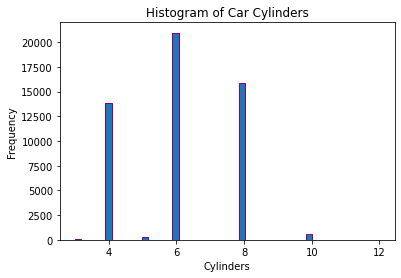

In [47]:
#histogram untuk jumlah silinder
plt.hist(df['cylinders'], bins=50, edgecolor='purple')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Histogram of Car Cylinders')
plt.show()

* histogram jumlah silinder nampak normal, terbagi sesuai jumlah kepemilikan jumlah silinder pada masing - masing kendaraan.
* tampak sebagian besar kendaraan memiliki 6 silinder 
* nampak ada nilai > 4 dan ada juga kendaraan dengan kepemilikan 10 silinder

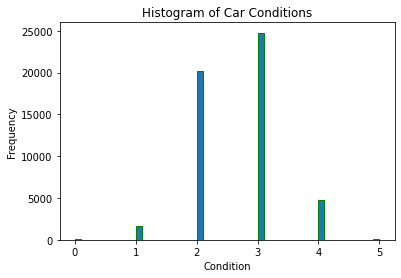

In [48]:
#histogram untuk kondisi 
plt.hist(df['condition'], bins=50, edgecolor='green')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Histogram of Car Conditions')
plt.show()

* histogram kondisi juga terlihat normal, data - datanya tersebar sesuai dengan kondisi kendaraan.
* hanya ada sedikit kendaraan dengan nilai 0  dan 5 
* kendaraan dengan nilai 3 menduduki distibursi terbesar 

* Kesimpulan semantara :
  * memang tidak terlalu mudah untuk melihat distribusi data secara detail dengan histogram mungkin metode lain akan lebih membantu dan dapat menentukan nilai mana yang harus dihapus atau dipertahankan.
  * beberapa kolom memang tampak mencurigakan dengan adanya nilai 0 contoh pada kolom 'odometer' lalu ada nilai yang sangat tinggi untuk kolom 'age' yaitu 115 tahun , atau mungkin ini kendaraan classic yang diperjual belikan untuk koleksi kerana kondisinya lumayan.

## Mempelajari dan Menangani Outlier <a id='outlier'></a>

* kolom yang menarik perhatian dan kemungkinan memiliki oulier adalah kolom : 'price', 'age', dan 'odometer'.
* langkah - langkah yang diambil adalah mencoba boxplot() untuk melihat secara umum keseluruhan dataframe dan kemungkinan - kemungkinan outliers atau anomali.
* membuat histogram , menentukan batas atas dan bawah untuk menemukan outlier.

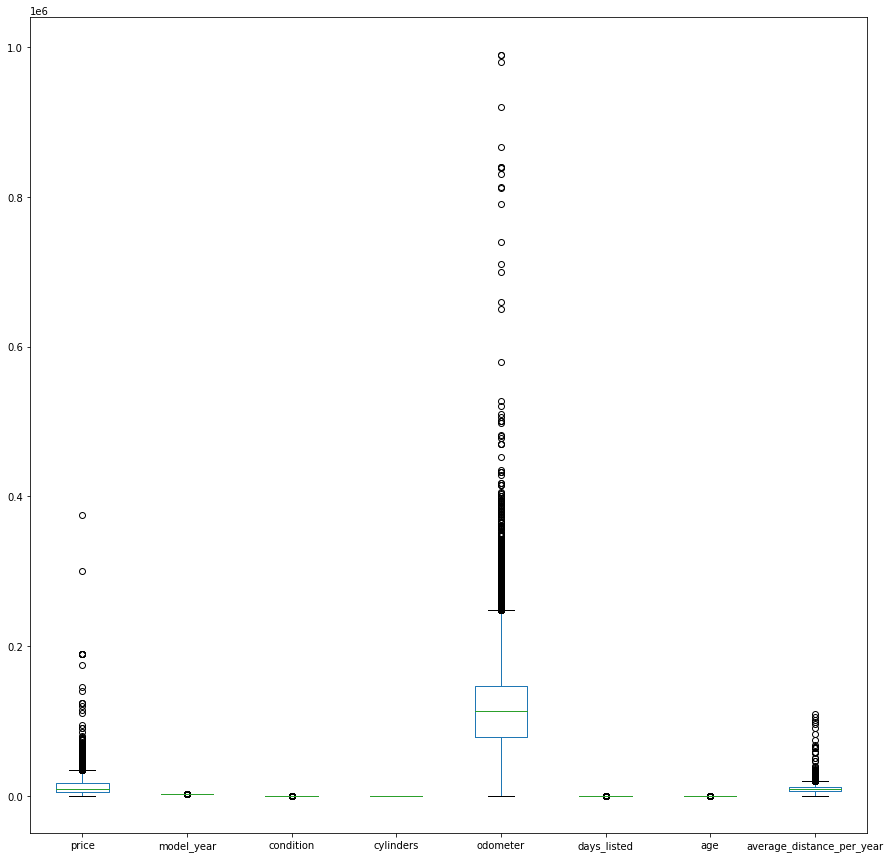

In [49]:
df.plot.box(figsize=(15,15))
plt.show()

*  ada beberapa kolom yang kemungkinan memiliki outlier, kolom odometer sangat menonjol disini.
   * kolom 'price' nampak memiliki titik - titik di luar data tipikal bisa jadi ini outlier.
   * kolom 'odometer' sangat jelas sekali memiliki banyak nilai diluar data tipikal 
   * kolom 'age' nampak tenang dan tidak ada nilai - nilai anomali dan outlier, namun akan tetap diperiksa agar lebih jelas
   * kolom average_distance_per_year memiliki outlier karena merupakan rata - rata dari odometer yang juga memiliki outlier.

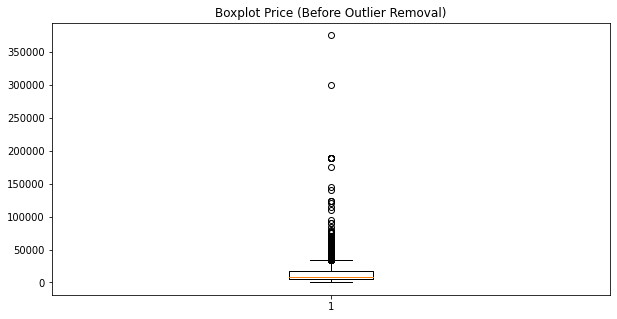

In [50]:
#kolom normal 'price'
plt.figure(figsize=(10,5))
plt.boxplot(df['price'])
plt.title('Boxplot Price (Before Outlier Removal)')
plt.show()

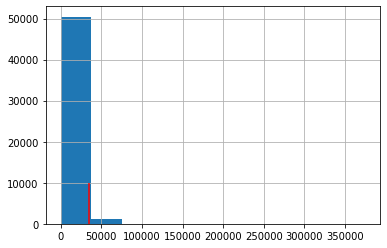

In [51]:
# Kolom 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['price'].hist()
plt.vlines(x=upper_bound, ymin=10, ymax=10000, colors='red')

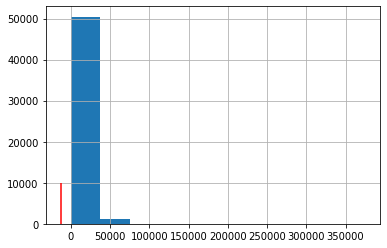

In [52]:
lower_bound = Q1 - 1.5 * IQR
df['price'].hist()
plt.vlines(x=lower_bound, ymin=10, ymax=10000, colors='red')

In [53]:
#kolom 'price' memang memiliki outlier, kita akan hapus outliernya dan menyimpan dalam dataframe baru
df_price_outlier_removed = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

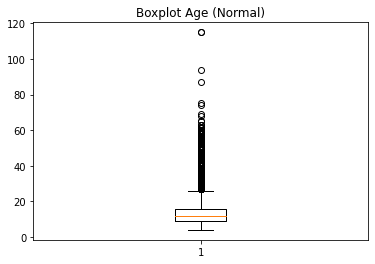

In [54]:
# kolom age normal
plt.boxplot(df['age'])
plt.title("Boxplot Age (Normal)")
plt.show()

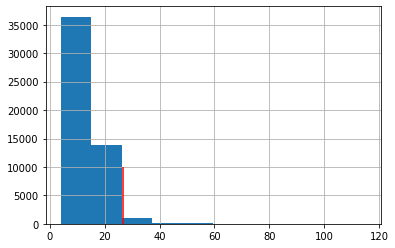

In [55]:
#batas atas dan bawah kolom 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['age'].hist()
plt.vlines(x=upper_bound, ymin=10, ymax=10000, colors='red')

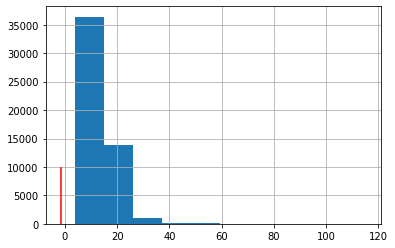

In [56]:
lower_bound = Q1 - 1.5 * IQR
df['age'].hist()
plt.vlines(x=lower_bound, ymin=10, ymax=10000, colors='red')

In [57]:
#dataframe baru untuk kolom 'age'
df_age_outlier_removed = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

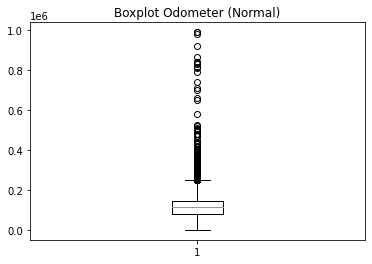

In [58]:
#kolom odometer
plt.boxplot(df['odometer'])
plt.title("Boxplot Odometer (Normal)")
plt.show()

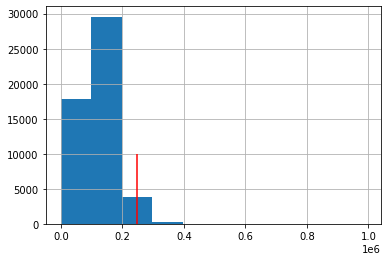

In [59]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['odometer'].hist()
plt.vlines(x=upper_bound, ymin=10, ymax=10000, colors='red')

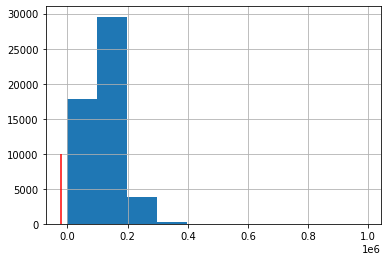

In [60]:
lower_bound = Q1 - 1.5 * IQR
df['odometer'].hist()
plt.vlines(x=lower_bound, ymin=10, ymax=10000, colors='red')

In [61]:
#dataframe baru untuk odometer
df_odometer_outlier_removed = df[(df['odometer'] > lower_bound) & (df['odometer'] < upper_bound)]

## Mempelajari Parameter Inti Tanpa Outlier <a id='tanpa'></a>

[Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.]

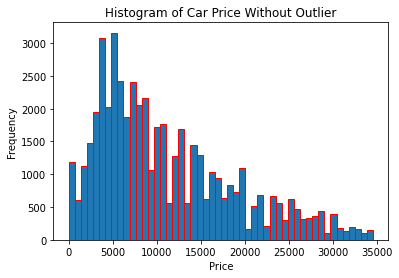

In [62]:
#dataframe baru untuk kolom 'price'
plt.hist(df_price_outlier_removed ['price'], bins=50, edgecolor='red')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Car Price Without Outlier')
plt.show()

* histogram untuk kolom 'price' tanpa outlier
  * data nampak terdistrubusi dengan baik dan lebih detail dibandingan dengan histogram kolom 'price' dengan outlier
  * puncak histogram terjadi dikisaran angka 5000 - 10.000 , data sebagaian besar terdistribusi di angka - angka tersebut.

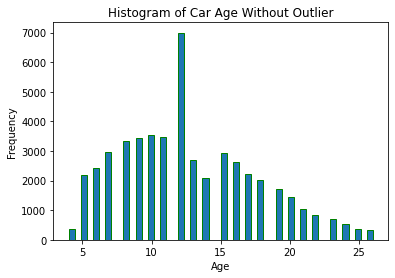

In [63]:
#dataframe baru untuk kolom 'age'
plt.hist(df_age_outlier_removed ['age'], bins=50, edgecolor='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Car Age Without Outlier')
plt.show()

* nampaknya tidak ada outlier di kolom 'age' histogramnya nampak sama sebelum dan sesudah otlier dihapus
* walaupun histogram dengan batas atas dan bawah yang telah diterapkan menunjukan adanya outlier, namun diagram boxplot tidak demikian.

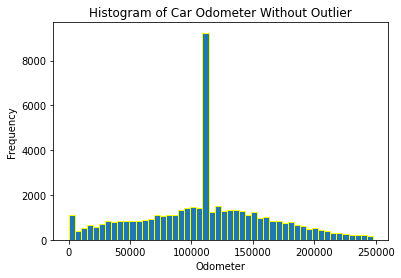

In [64]:
#dataframe baru untuk kolom 'odometer'
plt.hist(df_odometer_outlier_removed ['odometer'], bins=50, edgecolor='yellow')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Histogram of Car Odometer Without Outlier')
plt.show()

* datanya nampak lebih terdistribusi 
* pada angka 0 nampak berada dipuncak karena memang adanya nilai 0 yang berjumlah 185 baris dan cukup banyak untuk dihapus
* selain angka 0 datanya nampak merata sampai ke angka 34.000

## Masa Berlaku Iklan <a id='iklan'></a>
[Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.]

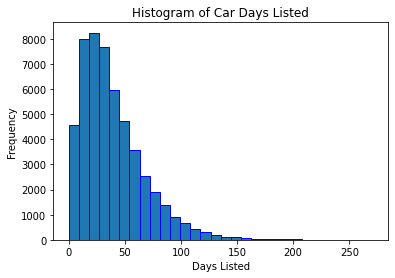

In [65]:
plt.hist(df['days_listed'], bins=30, edgecolor='blue')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.title('Histogram of Car Days Listed')
plt.show()

In [66]:
# hitung rata-rata hari iklan ditayangkan
mean_days_listed = df['days_listed'].mean()
mean_days_listed

39.55475982532751

In [67]:
# hitung median hari iklan ditayangkan
median_days_listed = df['days_listed'].median()
median_days_listed

33.0

* secara umum iklan ditayangkan 30 sampai 40 hari sekitar sebulan lebih

In [68]:
# Menentukan iklan yang dihapus dengan cepat
mean_day_listed = 39.55475982532751
fast_removed_ads = df[df['days_listed'] < mean_day_listed]
len(fast_removed_ads)

30617

* menentukan iklan yang dihapus dengan cepat adalah jika 'days_listed kurang dari rata-rata waktu iklan ditayangkan
  ada sebanyak 30617 iklan yang dihapus dengan cepat

In [69]:
# Menentukan iklan yang ditayangkan dalam waktu yang sangat lama
median_day_listed = 33.0
long_listed_ads = df[df['days_listed'] > median_day_listed]
len(long_listed_ads)

25528

* menentukan ikaln yang diyangkan dalam waktu yang lama adalah jika waktu iklan ditayangkan lebih besar dari median waktu iklan ditayangkan dan jumlahnya adalah 25528 lebih banyak dari iklan yang dihapus dengan cepat

## Harga Rata-Rata Setiap Jenis Kendaraan <a id='harga'></a>

[Lakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buatlah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   price                      51525 non-null  int64         
 1   model_year                 51525 non-null  int64         
 2   model                      51525 non-null  object        
 3   condition                  51525 non-null  int64         
 4   cylinders                  51525 non-null  int64         
 5   fuel                       51525 non-null  object        
 6   odometer                   51525 non-null  float64       
 7   transmission               51525 non-null  object        
 8   type                       51525 non-null  object        
 9   paint_color                51525 non-null  object        
 10  is_4wd                     51525 non-null  bool          
 11  date_posted                51525 non-null  datetime64[ns]
 12  days

In [71]:
# menghitung jumlah iklan untuk setiap jenis kendaraan
car_count = df.pivot_table(index='model', values='days_listed',aggfunc='count')

# menghitung harga rata-rata untuk setiap jenis kendaraan
car_mean_price = df_price_outlier_removed.pivot_table(index='model', values='price')

# membuat dataframe baru yang berisi informasi jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan
car_df = car_count.merge(car_mean_price, on='model')
car_df

,days_listed,price
model,,
acura tl,236,6474.500000
bmw x5,267,10254.216730
buick enclave,271,11332.855556
cadillac escalade,322,12697.256140
chevrolet camaro,414,11495.160305
...,...,...
toyota sienna,329,8535.444785
toyota tacoma,827,15052.000000
toyota tundra,603,13586.597582


<AxesSubplot:xlabel='days_listed', ylabel='price'>

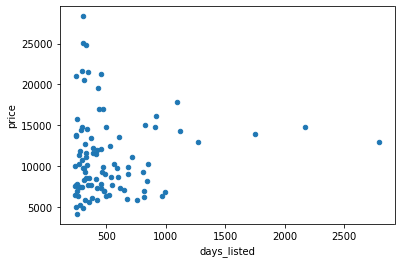

In [72]:
car_df.plot(x='days_listed', y='price',kind='scatter')

In [73]:
days_listed_koef = df['days_listed'].corr(df['days_listed'])
days_listed_koef

1.0

In [74]:
price_koef = df_price_outlier_removed['price'].corr(df_price_outlier_removed['price'])
price_koef

0.9999999999999999

* jika nilai days_listed meningkat maka nilai 'price' juga meningkat karena keduanya punya koneksi
* jika jumlah waktu iklan bertambah maka harganya pun akan bertambah

In [75]:
top_cars = car_df.sort_values(by='days_listed',ascending=False)
top_cars

,days_listed,price
model,,
ford f-150,2796,12984.815838
chevrolet silverado 1500,2171,14751.173104
ram 1500,1750,13971.075986
chevrolet silverado,1271,12916.960429
jeep wrangler,1119,14277.662983
...,...,...
dodge dakota,242,4990.702479
ford f-250 super duty,241,13870.653266
acura tl,236,6474.500000


In [76]:
# menentukan dua jenis kendaraan dengan jumlah iklan yang paling banyak
top_2_cars = top_cars.index[:2]
top_2_cars

Index(['ford f-150', 'chevrolet silverado 1500'], dtype='object', name='model')

## Faktor Harga <a id='faktor'></a>

[Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.]

[Manfaatkan matriks korelasi dan plot korelasi]

In [77]:
df_popular = df.query("model == 'ford f-150' or model == 'chevrolet silverado 1500'")


In [78]:
df_popular.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age,average_distance_per_year
price,1.000000,0.557405,0.302502,-0.117794,-0.463202,0.208722,-0.006207,-0.557405,0.002987
model_year,0.557405,1.000000,0.356404,-0.118477,-0.454775,0.216110,-0.017956,-1.000000,0.267061
condition,0.302502,0.356404,1.000000,-0.012533,-0.336443,0.101192,-0.017753,-0.356404,-0.047614
cylinders,-0.117794,-0.118477,-0.012533,1.000000,0.082675,0.130394,0.006940,0.118477,-0.043268
odometer,-0.463202,-0.454775,-0.336443,0.082675,1.000000,-0.081782,0.023217,0.454775,0.612074
is_4wd,0.208722,0.216110,0.101192,0.130394,-0.081782,1.000000,-0.014201,-0.216110,0.079991
days_listed,-0.006207,-0.017956,-0.017753,0.006940,0.023217,-0.014201,1.000000,0.017956,-0.001122
age,-0.557405,-1.000000,-0.356404,0.118477,0.454775,-0.216110,0.017956,1.000000,-0.267061
average_distance_per_year,0.002987,0.267061,-0.047614,-0.043268,0.612074,0.079991,-0.001122,-0.267061,1.000000


In [ ]:
df_scatter = df_popular[['price', 'age', 'odometer', 'condition']]
pd.plotting.scatter_matrix(df_scatter, figsize=(9, 9))
plt.show() <this code is works!>

NameError: name 'scatter_matrix' is not defined

In [ ]:
df_popular_outlier_removed = df_odometer_outlier_removed.query("model == 'ford f-150' or model == 'chevrolet silverado 1500'")

In [ ]:
df_scatter = df_popular_outlier_removed[['price', 'age', 'odometer', 'condition', 'transmission', 'paint_color']]
scatter_matrix(df_scatter, figsize=(9, 9))
plt.show()

In [ ]:
df_popular_outlier_removed.corr()

In [ ]:
# Memastikan kategori memiliki setidaknya 50 iklan
df_popular = df_popular[df_popular['days_listed'] > 50]

In [ ]:
#boxplot
# Boxplot untuk jenis transmisi
plt.figure(figsize=(10,5))
plt.boxplot(df_popular['price'], vert=True, showfliers=False, showmeans=True, labels=['price'])
plt.xticks(rotation=90)
plt.xlabel('Price')
plt.title('Boxplot of Price by Transmission')
plt.show()

# Boxplot untuk warna
plt.figure(figsize=(10,5))
plt.boxplot(df_popular['price'], vert=True, showfliers=False, showmeans=True, labels=['price'])
plt.xticks(rotation=90)
plt.xlabel('Price')
plt.title('Boxplot of Price by Paint Color')
plt.show()

In [ ]:
# Scatterplot untuk usia kendaraan
cols = ['model_year', 'condition', 'cylinders', 'odometer', 'is_4wd', 'age', 'average_distance_per_year']

for col in cols:
    fig, ax = plt.subplots()
    ax.scatter(df_popular[col], df_popular['price'])
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(f"Scatter Plot of {col} vs Price")
    plt.show()



## Kesimpulan Umum <a id='end'></a>
[Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]

* adanya nilai hilang pada beberapa kolom :
  * 'model_year' 51525 - 47906  = 3619
  * 'cylinders' 51525 - 46265 = 5260
  * 'odometer' 51525 - 43633 = 7892
  * 'paint_color'51525 - 42258 = 9267
  * 'is_4wd' 51525 - 25572 = 25953
* nilai hilang pada Kolom Kategoris :
  * kolom 'paint_color' yang merupakan warna dari kendaraan
  * kolom 'is_4wd' yang merupakan kolom yang menunjukan nilai apakah sebuah kendaraan bernilai True or False untuk keterangan penggerak 4 roda 
* nilai hilang kolom Numerik :
  * kolom 'model_year' yang berisi data numerik yang menunjukan tahun pembuatan kendaraan 
  * kolom 'cylinders' yang menunjukan jumlah silinder pada kendaraan
  * kolom 'odometer' yang merupakan jarak tempuh kendaraan pada saat iklan ditayangkan
* penanganan nilai hilang :
  * kolom - kolom dengan nilai yang hilang nampaknya berbeda kategori untuk kolom dengan variabel kategoris maka akan diterapkan metode fillna() 
  * kolom dengan variabel numerik akan di analisis terlebih dahulu apakah ada nilai oulier, jika tidak ada maka nilai yang hilang akan diisi dengan mean() jika ada oulier maka nilai yang hilang akan diisi dengan median()

* Nilai Duplikat tidak ditemukan setelah dilakukan penerapan method duplicates() pada dataframe
* outliers ditemukan pada beberapa kolom seperti : 'price','odometer', dan 'average_distance_per_year'
  * memeriksa outliers dengan histogram dan boxplot
  * menentukan batas atas dan bawah untuk menyelidiki dan menentukan outliers
  * penanganan outliers adalah dengan penghapusan data yang merupakan outlier dan menyimpan pada dataframe baru untuk dilakukan perbandingan dan analisis lebih lanjut

* Terdapat korelasi antara jumlah penayangan iklan dan harga, dan korelasinya positif sehingga ketika jumlah waktu iklannya meningkat maka harganya juga akan meningkat 
* terdapat korelasi juga antara harga dengan usia kendaraan walaupun tidak terlalu signifikan, mungkin semakin sedikit usia nya semakin mahal harganya karena nilainya negatif.
* ada keterkaitan antara harga dengan odometer, namun kolom odometer sebelumnya memiliki nilai outliers, jika dilihat tanpa outlier maka hasil koefisiennya positif , jarak tempuh yang meningkat akan meningkatkan harga nya.

* Solusi 
 * menambah jumlah waktu iklan untuk kendaraan - kendaraan yang kurang laku
 * lebih banyak memilih usia kendaraan yang lebih pendek sehingga kendaraan dinilai lebih 'baru'
 * kendaraan dengan jarak tempuh lebih banyak mungkin dinilai sebagai kendaraan dengan performa yang prima ini juga bisa mempengaruhi meningkatnya harga kendaraan 
